In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [14]:
df = pd.read_csv("../datasets/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [15]:
df.rename(columns = {"Income($)" : "Income"}, inplace = True)

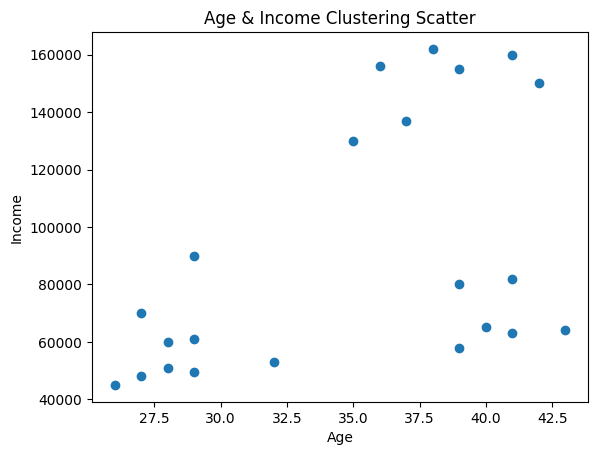

In [17]:
plt.scatter(df["Age"], df["Income"])
plt.title("Age & Income Clustering Scatter")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [23]:
km = KMeans(n_clusters = 3)
km.fit(df[["Age", "Income"]])
y_predicted = km.predict(df[["Age", "Income"]])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [24]:
df["Cluster"] = y_predicted
df.head()

,Name,Age,Income,Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [34]:
scaler = MinMaxScaler()
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])
df.head()

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [40]:
km = KMeans(n_clusters = 3)
km.fit(df[["Age", "Income"]])
y_predicted = km.predict(df[["Age", "Income"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [41]:
df["Cluster"] = y_predicted

In [42]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

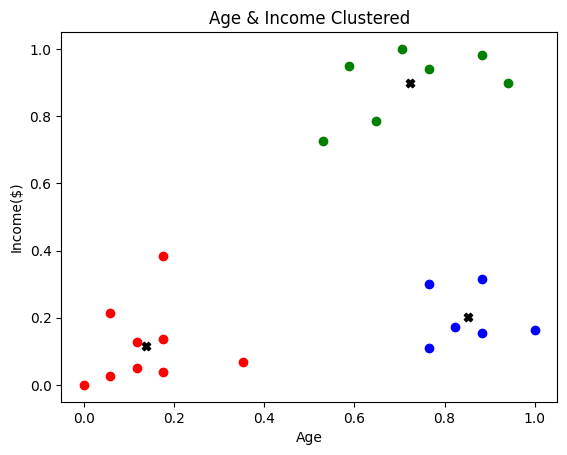

In [43]:
df_c1 = df[df["Cluster"] == 0]
df_c2 = df[df["Cluster"] ==1]
df_c3 = df[df["Cluster"] == 2]

plt.scatter(df_c1["Age"], df_c1["Income"], color = "red")
plt.scatter(df_c2["Age"], df_c2["Income"], color = "green")
plt.scatter(df_c3["Age"], df_c3["Income"], color = "blue")

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = "black", marker = "X")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.title("Age & Income Clustered")

plt.show()

In [53]:
k_list = range(1, 10)
errors = []

for k in k_list:
    km = KMeans(n_clusters = k)
    km.fit(df[["Age", "Income"]])
    errors.append(km.inertia_)
    print(f"K : {k} - DONE")
print("DONE")

K : 1 - DONE
K : 2 - DONE
K : 3 - DONE
K : 4 - DONE
K : 5 - DONE
K : 6 - DONE
K : 7 - DONE
K : 8 - DONE
K : 9 - DONE
DONE


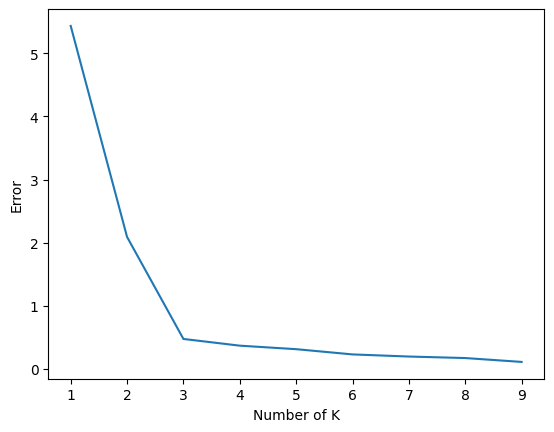

In [54]:
plt.plot(k_list, errors)
plt.xlabel("Number of K")
plt.ylabel("Error")

plt.show()